101


Saving Plot Image at Checkpoint: 0.0 s
Saving Plot Image at Checkpoint: 0.002 s
Saving Plot Image at Checkpoint: 0.004 s
Saving Plot Image at Checkpoint: 0.006 s
Saving Plot Image at Checkpoint: 0.008 s
Saving Plot Image at Checkpoint: 0.01 s



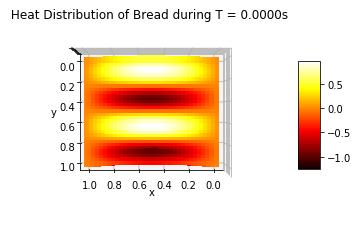

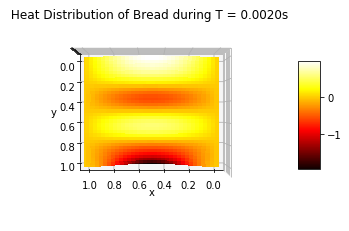

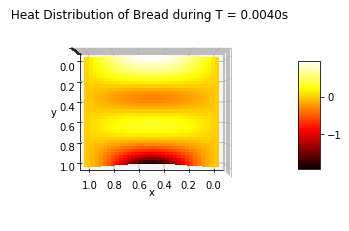

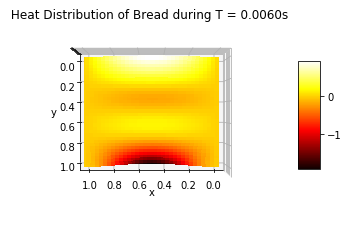

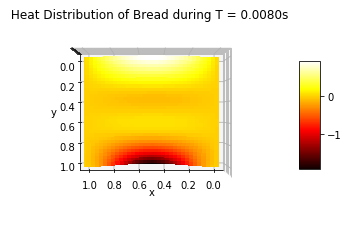

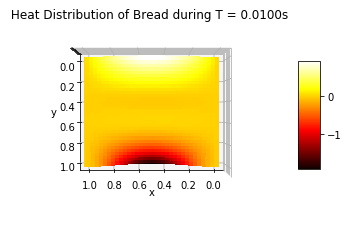

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.ticker import LinearLocator
from tqdm.notebook import tqdm


class Bread:

    """
    
    The following class are methods used
    to model the 2-D Heating PDE about its x and y dimension.

    T(x,y,t) - Temperature given radius and time, x <= 1, y <= 1 and t>=0 

    PDE: dT/dt = α (d^2T/ dx^2 + d^2T/ dy^2)

    """

    def __init__(self, 
                 X,
                 Y,
                 name,
                 alpha=1.0,
                 ):
        
        self.X = X
        self.Y = Y
        self.alpha = alpha
        self.name = name

        # TBD
        self.T_map = []
        self.dx = 0
        self.dy = 0
        self.dt = 0
        self.cool_time = 0 #s

    def solve(self, dx, dy, dt, save_every, cool_time=10):
        
        self.dx = dx
        self.dy = dy
        self.dt = dt
        self.cool_time = cool_time
        
        x_ = np.linspace(0, self.X, round(self.X/dx)+1)
        y_ = np.linspace(0, self.Y, round(self.Y/dy)+1)
        X_, Y_ = np.meshgrid(x_ , y_);
        print(len(y_))
        
        # Multiply
        T_cur = np.sin(np.pi*X_) * np.sin(4*np.pi*Y_)
        
        #Boundary Conditions
        BC1 = 0                    # T(x=0,y,t)
        BC2 = 0                    # T(x=1,y,t)
        BC3 = np.sin(np.pi*x_)      # T(x,y=0,t)
        BC4 = np.cos(2*np.pi*x_)-1  # T(x,y=1,t)
        
        # Index as T[y][x] 
        T_cur[:][0] = BC1 
        T_cur[:][-1] = BC2
        T_cur[0][:] = BC3
        T_cur[-1][:] = BC4
        
        T_old = T_cur.copy()
            
        for t in tqdm(range(round(cool_time/dt)+1)):

            for y in range(1,len(y_)-1):

                for x in range(1,len(x_)-1):

                    # Explicit Time Advancement
                    a =  ( T_old[y][x+1] - 2*T_old[y][x] + T_old[y][x-1] ) / (dx*dx)
                    b =  ( T_old[y+1][x] - 2*T_old[y][x] + T_old[y-1][x] ) / (dy*dy)

                    T_cur[y][x] = (dt*(a+b)) + T_old[y][x];

            T_old = T_cur

            # Save Plot 
            if (t % round(save_every/dt) == 0):
                
                print("Saving Plot Image at Checkpoint: {} s".format(t* dt))
                self.save_plot(X_, Y_, T_cur, t)
                
    
    def save_plot(self, X_, Y_, T_cur, t):
        
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        surf = ax.plot_surface(X_, Y_, T_cur, cmap=cm.hot,
                               linewidth=0, antialiased=False)

        fig.colorbar(surf, shrink=0.5, aspect=5)
        ax.set_xlabel('x'); 
        ax.set_ylabel('y');
        ax.set_zticklabels([])
        ax.view_init(azim=90, elev=90)         
        ax.set_title(" Heat Distribution of {} during T = {:.4f}s".format(self.name, t*self.dt))
        file_name = 'imgs/bread_1/{}_{}_heat_plot.jpg'.format(self.name.replace(" ", "_"), str(t))
        plt.savefig(file_name, dpi=200)
        
        
def main():

    bread = Bread(X=1, Y=1, name="Bread")
    bread.solve(dx=0.01, dy=0.01, dt=0.00002, save_every=.002, cool_time=0.01)

if __name__ == "__main__":
     main()

In [3]:
p = [1,2,3,4,5]

for i in range(1, len(p)-1):
    
    print(p[i])

2
3
4


In [15]:

print(0.1 % 0.1)

0.0
